# ERA5 time series of temperature during December 1999 AR case study event    

Created by Michelle L. Maclennan   
4 June 2021

## General instructions on downloading ERA5 datasets 

Note: for this research, we want ERA5 hourly data on single levels, 1979-present

1. All ERA5 datasets are available at https://cds.climate.copernicus.eu/#!/home. Make an account and login, then click on the "Datasets" tab at the top of the page. 
2. Search "ERA5" in the search bar on the left, then scroll down in the results and click on "ERA5 monthly averaged data on single levels from 1979 to present". Note that for any sub-monthly temporal resolution, you will need to download ERA5 hourly data. 
3. You can read the dataset Overview for information about ERA5 and the variables in the dataset. Then, click on "Download Data". Select "Monthly averaged reanalysis" for Product Type, your variable(s) of choice (in this case "Snowfall") for Variable, and the period of interest. In this case, I am selecting 1979-2019, all months, and Time 00:00 (which is the only time option for monthly data). Select the Geographical Area (I am using "Whole Available Region" but you can also subset the area by lat and lon). For Format I select NetCDF (it says it's experimental but it always works just fine). 
4. Click "Submit Form" in green at the bottom of the page. This will automatically take you to the "Your requests" tab where the server will show that it is processing the data request. 
5. After a few minutes, the request should generate a green "Download" button on the right. Click it to start the file download, which will be in the form of a single NetCDF file. For this example, the file is about 2 GB in size. Once it has been downloaded, I usually rename the file: in this case I've named it "era5_sl_mon_global_snowfall_1979_2020.nc". 



## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime

## Load ERA5 dataset

In [2]:
# Temperature
path = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
fn = 'era5_sl_hourly_Antarctic_t2m_1999_nov_dec.nc'
DS = xr.open_mfdataset(path+fn) 
E5_t2m = DS.t2m # (time,lat,lon)
lon = DS.longitude
lat = DS.latitude
time = DS.time
#"E5_t2m = np.array(E5_t2m[:,:,:])

In [3]:
E5_t2m

<xarray.DataArray 't2m' (time: 1464, latitude: 721, longitude: 1440)>
dask.array<open_dataset-b1fb9a5526866c6efd2ac3fa73dd8912t2m, shape=(1464, 721, 1440), dtype=float32, chunksize=(1464, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [3]:
# Set time variable 
time = np.array(time)
time_dates = []
for i in range(len(time)):
    string = np.array(time)[i].astype(str)
    split = string.split("T",1)
    time_dates.append(split[0])


## Isolate to Cavity and Channel camp gridpoints 


In [4]:
# Locations of AWS stations at Thwaites Cavity and Channel Camps 
cavity_lat = -75.033
cavity_lon = -105.617 # 254.383
channel_lat = -75.050
channel_lon = -105.4334 # 254.57

# Isolate ERA5 at gridpoint nearest to observations 
E5_t2m_cavity_channel_loc = np.array(E5_t2m[:,660,1018])


## Plot temperature time series during AR landfall 

In [6]:
len(xaxis)

NameError: name 'xaxis' is not defined

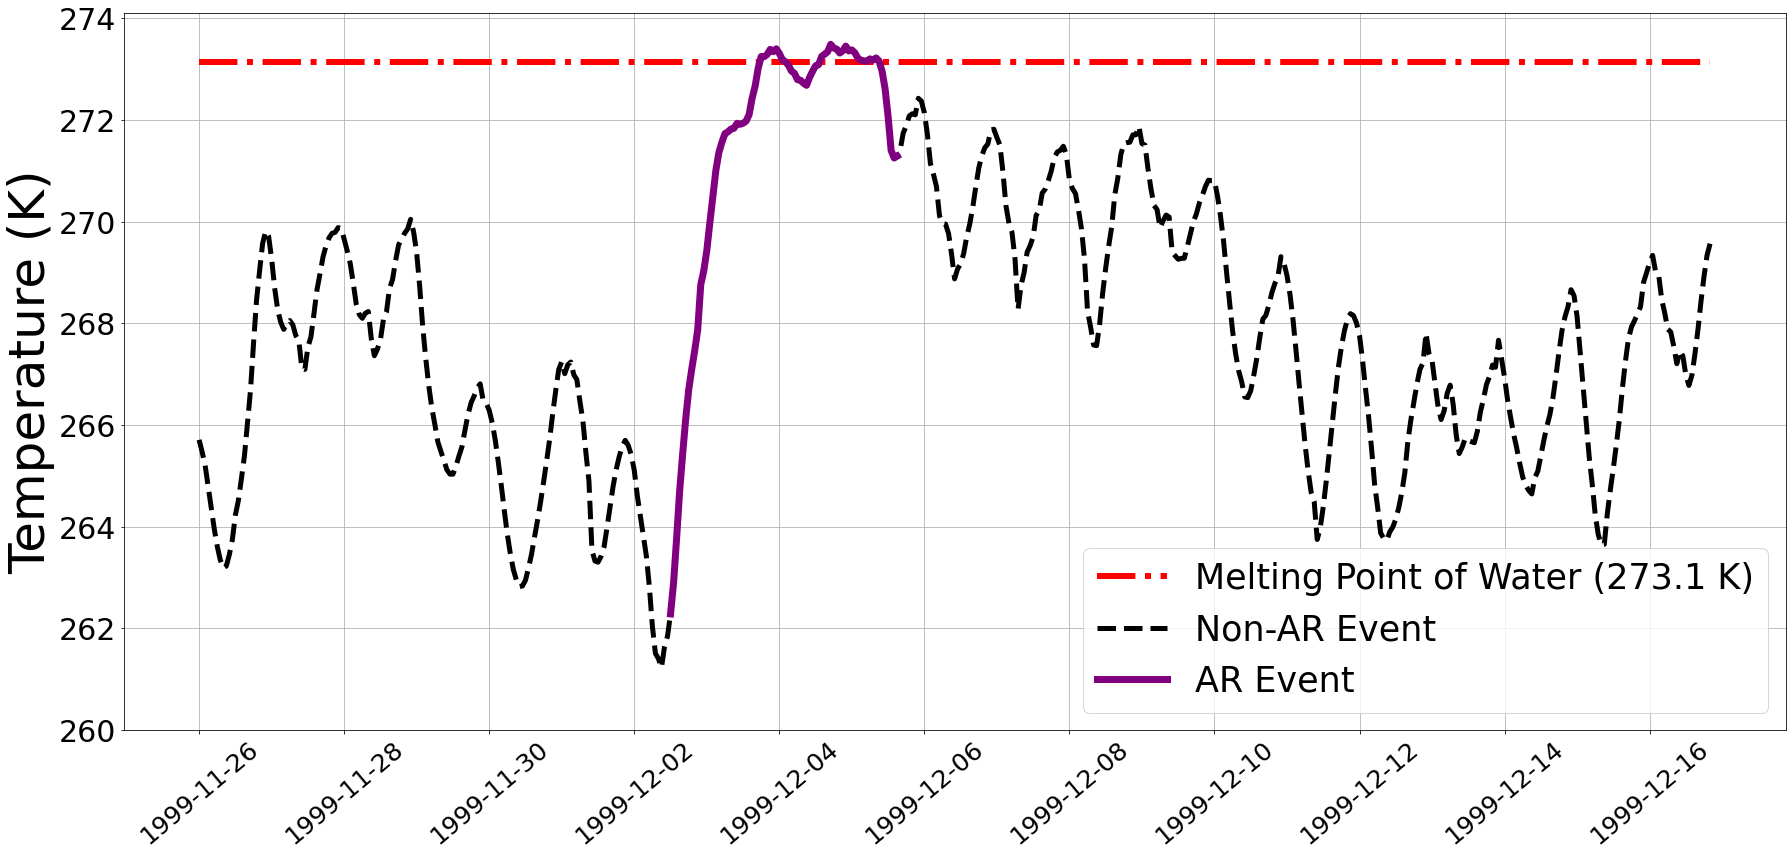

In [23]:
# Plot time series of temperature 
plt.figure(figsize=(25,12))
xaxis = np.linspace(0,len(time)-1,len(time))
plt.plot(xaxis[600:1101],np.repeat(273.15,len(xaxis))[600:1101], '-.', linewidth=6, color = 'red', label = 'Melting Point of Water (273.1 K)')
plt.plot(xaxis[600:1101],E5_t2m_cavity_channel_loc[600:1101], '--', linewidth=5, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832], E5_t2m_cavity_channel_loc[756:832], linewidth = 7, color = 'purple', label = 'AR Event')
plt.xticks(xaxis[600:1101][::48], time_dates[600:1101][::48], rotation = 40, fontsize = 25)
plt.yticks(np.arange(260,276, 2), fontsize=30)
plt.ylabel("Temperature (K)", fontsize = 50)
plt.tight_layout()
plt.grid()
plt.legend(loc = 'lower right', prop = {'size': 35})
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_temperature_nov26_dec16.jpg", dpi = 100)
plt.show()

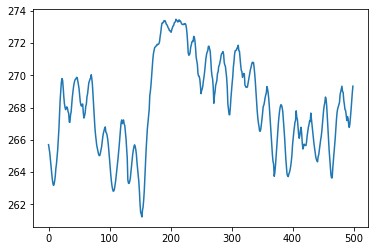

In [7]:
plt.plot(E5_t2m_cavity_channel_loc[600:1100])